In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

The dataset is about forest fire in Portugal, detailed information can be found here:
http://archive.ics.uci.edu/ml/datasets/Forest+Fires

## Atribut Information

For more information, read [Cortez and Morais, 2007].
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [2]:
data = pd.read_csv('../dataset/forestfires.csv')

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data.shape

(517, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Target

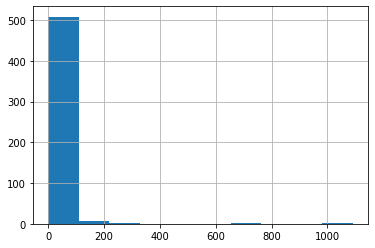

In [6]:
data['area'].hist()

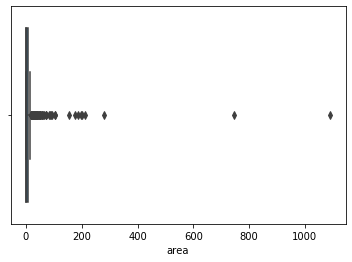

In [7]:
sns.boxplot(data=data, x='area')

In [8]:
# Area = 0

len(data[data['area'] <= 0])/len(data['area'])

0.47775628626692457

In [95]:
correlation = data.drop(['X','Y','month','day','area_categorical', 'area_multi_categorical',
       'location'], axis = 1)

In [96]:
correlation

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


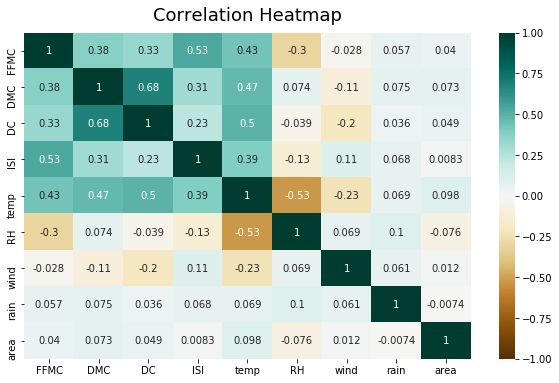

In [98]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Regression Exploration

# Time Series

In [9]:
from numpy import mean, median, sum

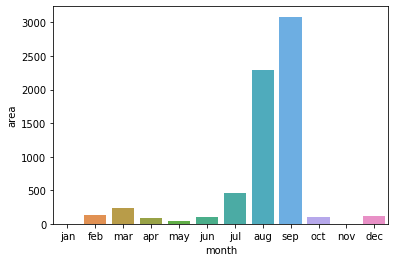

In [10]:
sns.barplot(x="month", y="area", data=data, 
            estimator=sum,
            order=['jan','feb','mar','apr','may','jun',
                    'jul','aug','sep','oct','nov','dec'],
            ci = None)

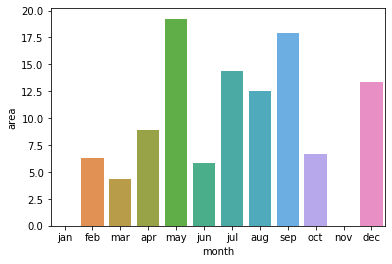

In [11]:
sns.barplot(x="month", y="area", data=data, 
            estimator=mean,
            order=['jan','feb','mar','apr','may','jun',
                    'jul','aug','sep','oct','nov','dec'],
            ci = None)

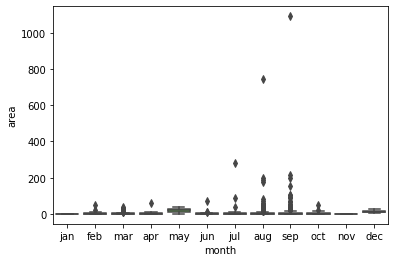

In [12]:
sns.boxplot(x="month", y="area", data=data, 
            order=['jan','feb','mar','apr','may','jun',
                    'jul','aug','sep','oct','nov','dec'])

Finding: from barplot and boxplot we can see there were wider forest fires happened on August and September. However, on May and December most of forest fires are larger by looking at the boxplot. 

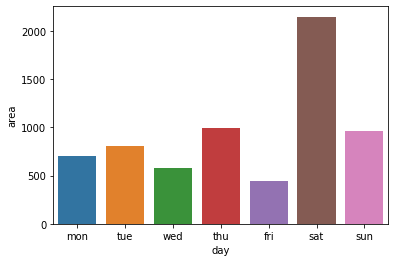

In [13]:
sns.barplot(x="day", y="area", data=data, 
            estimator=sum,
            order=['mon','tue','wed','thu',
                  'fri','sat','sun'],
            ci = None)

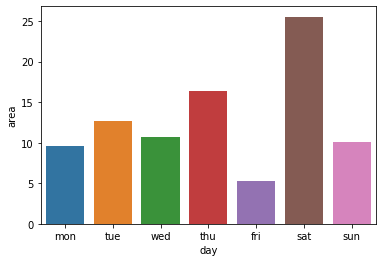

In [14]:
sns.barplot(x="day", y="area", data=data, 
            estimator=mean,
            order=['mon','tue','wed','thu',
                  'fri','sat','sun'],
            ci = None)

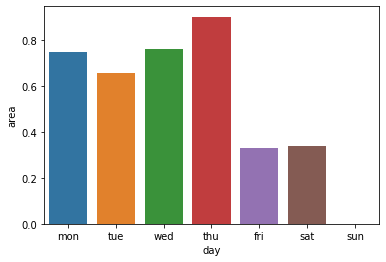

In [15]:
sns.barplot(x="day", y="area", data=data, 
            estimator=median,
            order=['mon','tue','wed','thu',
                  'fri','sat','sun'],
            ci = None)

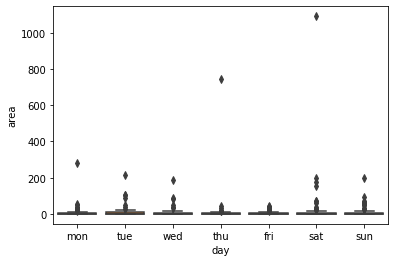

In [16]:
sns.boxplot(x="day", y="area", data=data, 
            order=['mon','tue','wed','thu',
                  'fri','sat','sun'])

# Correlation between systems and area

In [17]:
systems = ['FFMC','DMC','DC','ISI','area']

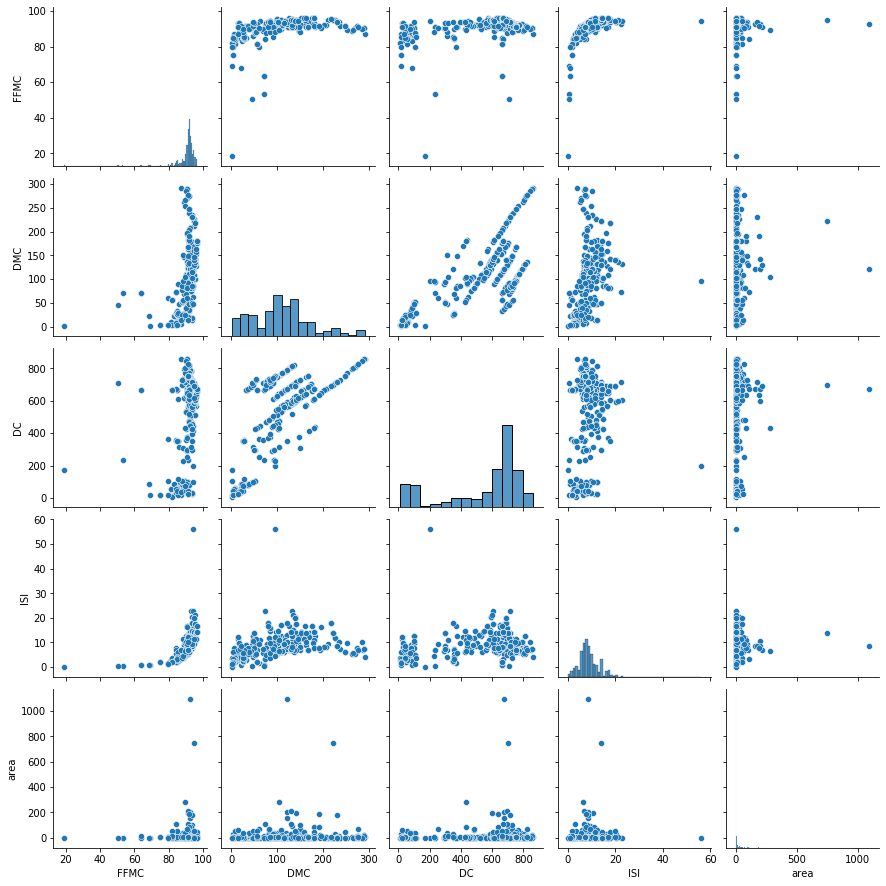

In [18]:
sns.pairplot(data[systems])

In [19]:
data[systems].corr()

,FFMC,DMC,DC,ISI,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.008258
area,0.040122,0.072994,0.049383,0.008258,1.000000


Finding: if we look at the variable individually to the area, then no signal found based on correlation

# Correlation between weather and area

In [20]:
weather = ['temp','RH','wind','rain','area']

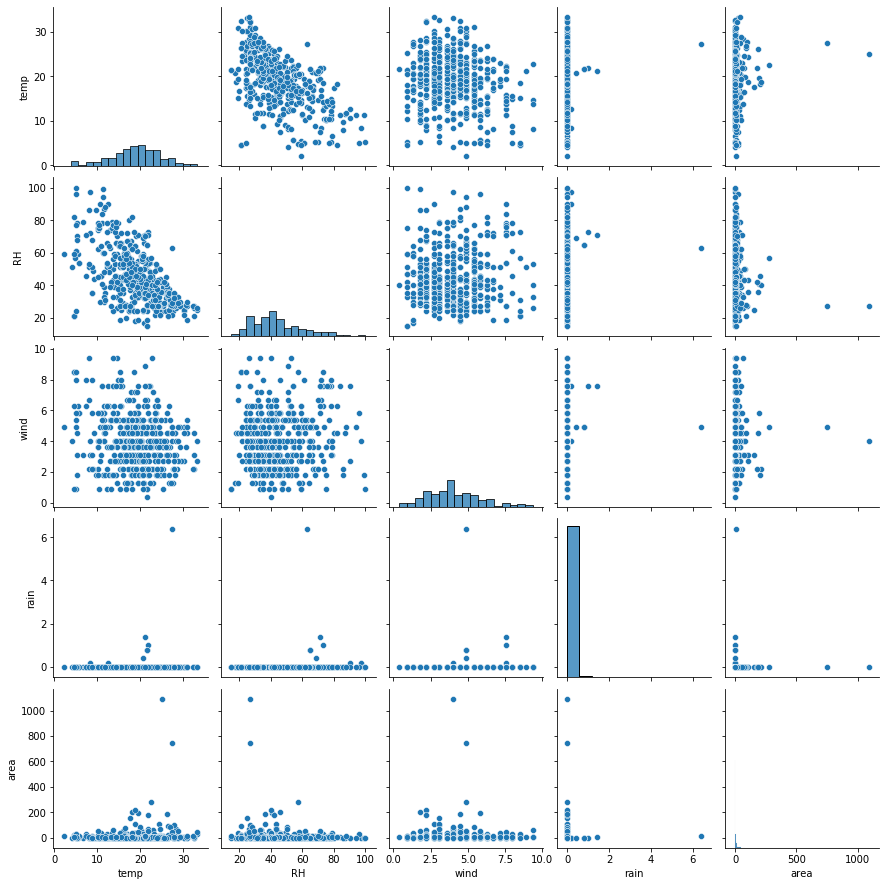

In [21]:
sns.pairplot(data[weather])

In [22]:
data[weather].corr()

,temp,RH,wind,rain,area
temp,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.097844,-0.075519,0.012317,-0.007366,1.000000


Finding: if we look at the variable individually to the area, then no signal found based on correlation

# Spatial

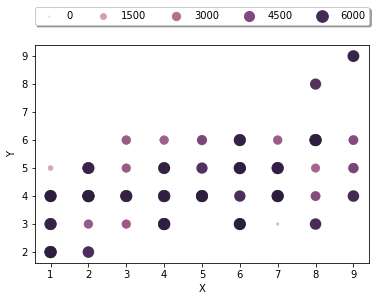

In [23]:
sns.scatterplot(data=data, x='X', y='Y', 
                size=data['area'].cumsum(),
                sizes=(1,150),
                hue = data['area'].cumsum())

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=7, fancybox=True, shadow=True)

Finding: Darker purples show wider area of fires in cummulative

# Binary Categorical Exploration

In [24]:
data['area_categorical'] = data['area'].apply(lambda x:1 if x > 0 else 0)

In [25]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_categorical
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


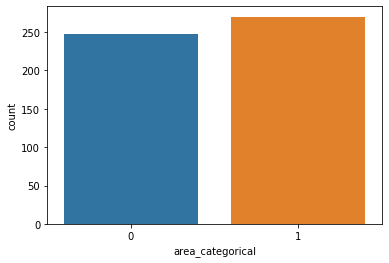

In [92]:
sns.countplot(data=data, x='area_categorical')

# Time Series

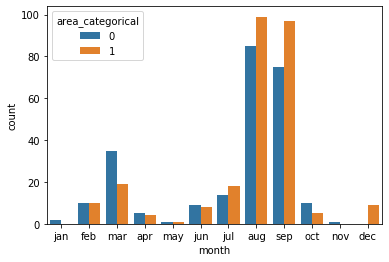

In [26]:
sns.countplot(data=data, x='month', 
              hue='area_categorical',
              order=['jan','feb','mar','apr','may','jun',
                    'jul','aug','sep','oct','nov','dec']
             )

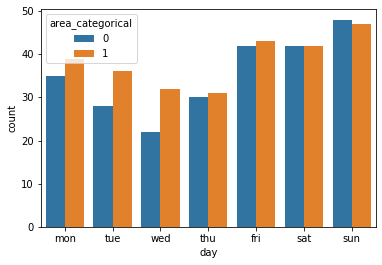

In [27]:
sns.countplot(data=data, x='day', 
              hue='area_categorical',
              order=['mon','tue','wed','thu',
                  'fri','sat','sun'],
             )

## Spatial

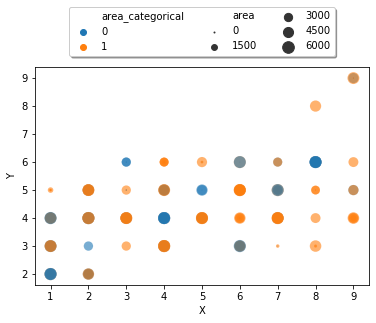

In [28]:
sns.scatterplot(data=data, x='X', y='Y', 
                size=data['area'].cumsum(),
                sizes=(1,150),
                hue = data['area_categorical'],
                alpha=0.6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)

## Correlation between systems and area

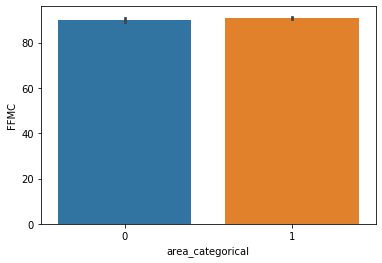

In [29]:
sns.barplot(data=data, x='area_categorical', y='FFMC', estimator=mean) 

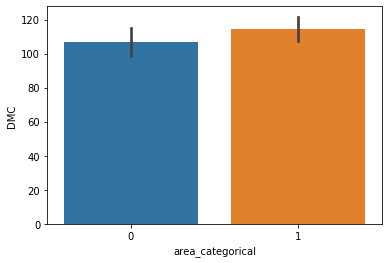

In [30]:
sns.barplot(data=data, x='area_categorical', y='DMC')

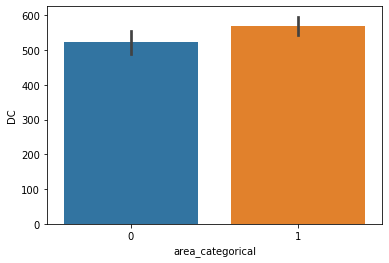

In [31]:
sns.barplot(data=data, x='area_categorical', y='DC')

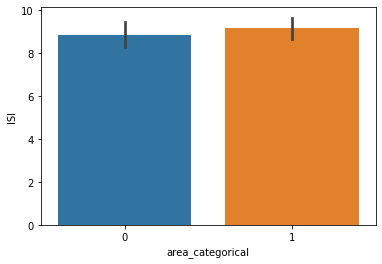

In [32]:
sns.barplot(data=data, x='area_categorical', y='ISI')

## Correlation between weather and area

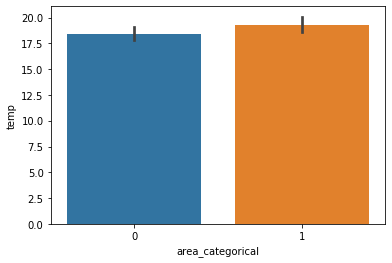

In [33]:
sns.barplot(data=data, x='area_categorical', y='temp', estimator=mean) 

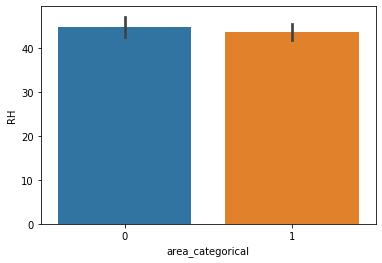

In [34]:
sns.barplot(data=data, x='area_categorical', y='RH', estimator=mean) 

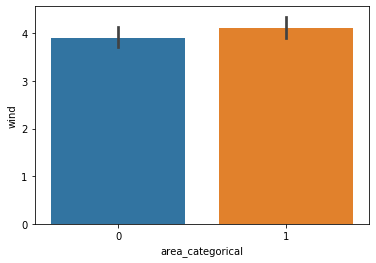

In [35]:
sns.barplot(data=data, x='area_categorical', y='wind', estimator=mean) 

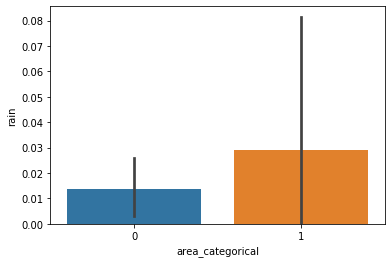

In [36]:
sns.barplot(data=data, x='area_categorical', y='rain', estimator=mean) 

# Multi Categorical Exploration

In [37]:
data['area'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [39]:
np.percentile(data['area'],95)

48.713999999999984

In [58]:
np.percentile(data['area'],70)

4.6339999999999995

In [59]:
def remap(x):
    if (x > 0 and x <= 5):
        return 1 #small
    elif (x > 5 and x <= 10):
        return 2 #medium
    elif (x > 10 and x <= 50):
        return 3 #large
    elif (x > 50):
        return 4 #very large
    else:
        return 0 #no fires

In [60]:
data['area_multi_categorical'] = data['area'].apply(remap)

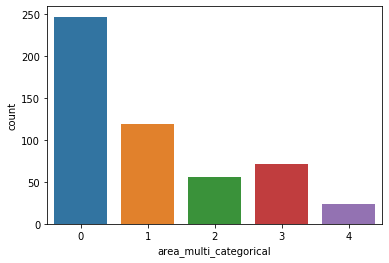

In [61]:
sns.countplot(data=data, x='area_multi_categorical')

## Time Series

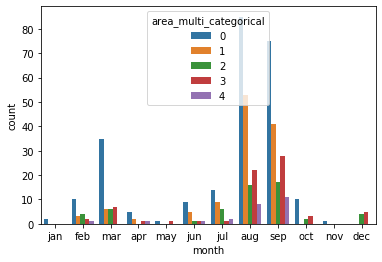

In [81]:
sns.countplot(data=data, x='month', 
              hue='area_multi_categorical',
              order=['jan','feb','mar','apr','may','jun',
                    'jul','aug','sep','oct','nov','dec']
             )

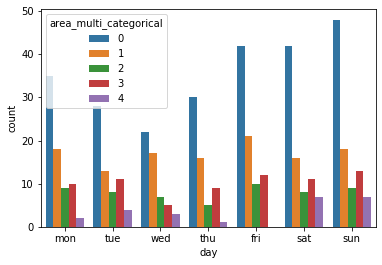

In [82]:
sns.countplot(data=data, x='day', 
              hue='area_multi_categorical',
              order=['mon','tue','wed','thu',
                  'fri','sat','sun'],
             )

## Spatial

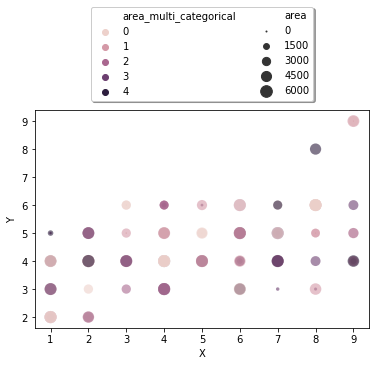

In [71]:
sns.scatterplot(data=data, x='X', y='Y', 
                size=data['area'].cumsum(),
                sizes=(1,150),
                hue = data['area_multi_categorical'],
                alpha=0.6)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=2, fancybox=True, shadow=True)

In [83]:
data['location'] = data['X'].astype('string')+'-'+data['Y'].astype('string')

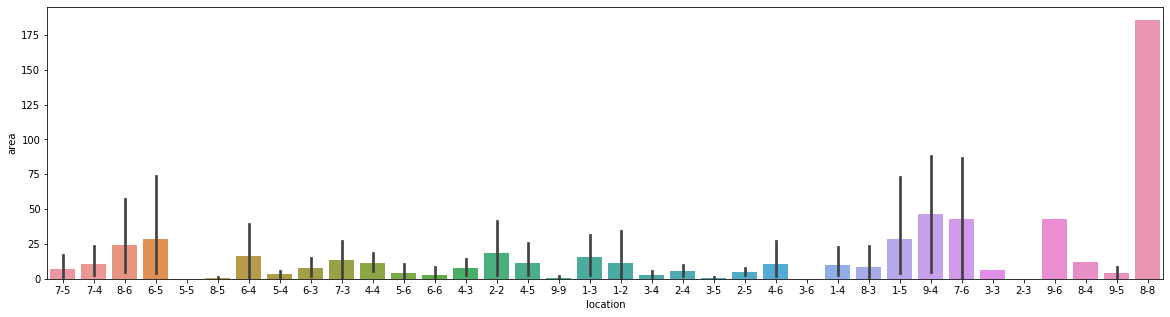

In [89]:
plt.figure(figsize=(20, 5))

sns.barplot(data=data, x='location', y='area', estimator=mean)

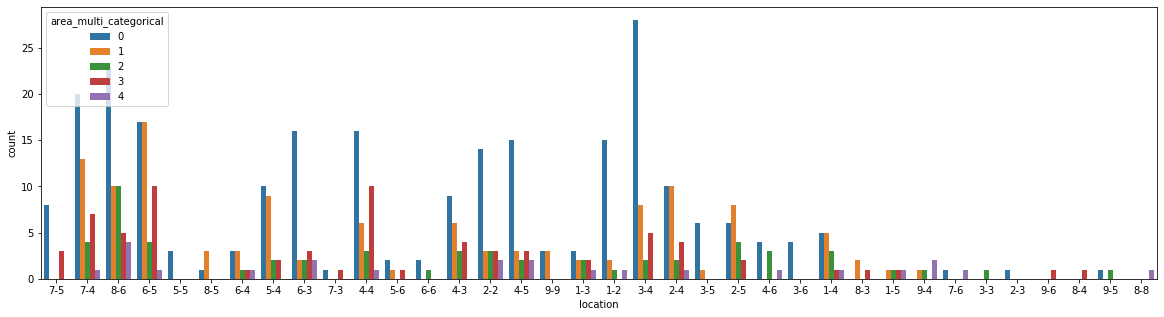

In [91]:
plt.figure(figsize=(20, 5))

sns.countplot(data=data, x='location', hue='area_multi_categorical')

## Correlation between systems and area

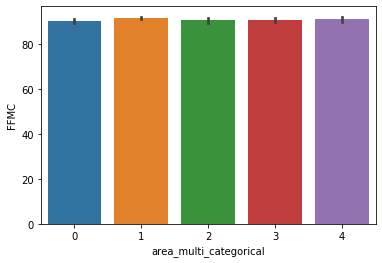

In [72]:
sns.barplot(data=data, x='area_multi_categorical', y='FFMC', estimator=mean) 

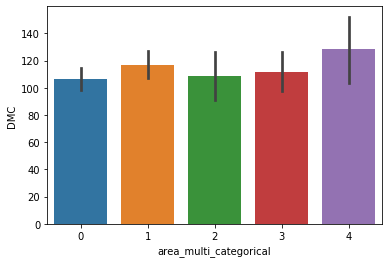

In [74]:
sns.barplot(data=data, x='area_multi_categorical', y='DMC', estimator=mean)

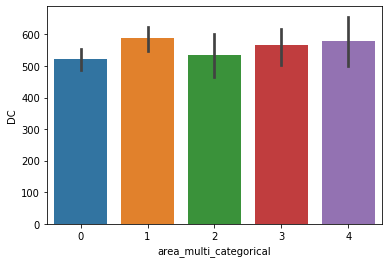

In [75]:
sns.barplot(data=data, x='area_multi_categorical', y='DC', estimator=mean)

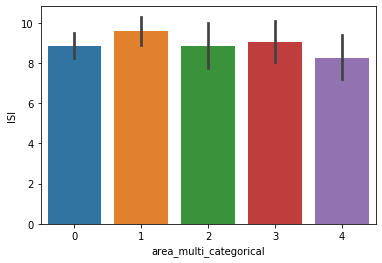

In [76]:
sns.barplot(data=data, x='area_multi_categorical', y='ISI', estimator=mean)

## Correlation between weather and area

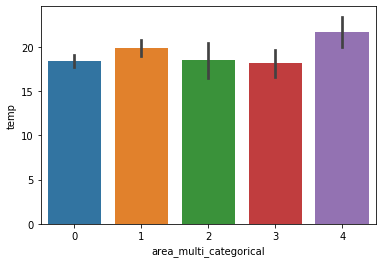

In [77]:
sns.barplot(data=data, x='area_multi_categorical', y='temp', estimator=mean)

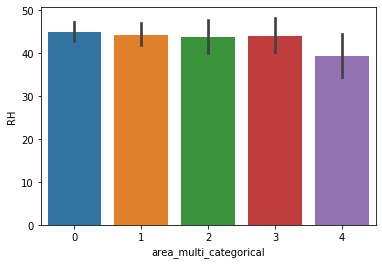

In [78]:
sns.barplot(data=data, x='area_multi_categorical', y='RH', estimator=mean)

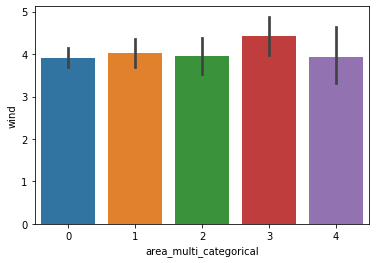

In [79]:
sns.barplot(data=data, x='area_multi_categorical', y='wind', estimator=mean)

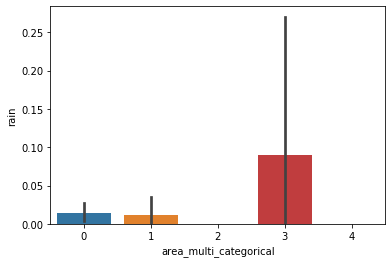

In [80]:
sns.barplot(data=data, x='area_multi_categorical', y='rain', estimator=mean)

---